In [68]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
import pandas as pd
import re
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

from function_library import *
from function_library2 import *

In [ ]:
# if en_core_web_sm not install, run the following lines 
# !python -m spacy download en_core_web_sm

# Extract all email domains related with Edison

In [72]:
l_from = fromPickle('from_list')
l_to = fromPickle('to_list')
l_cc = fromPickle('cc_list')

In [74]:
df = pd.read_csv('new_clean_output.csv',index_col=0)
df['Sent'] = pd.to_datetime(df['Sent'])
body = df['Body'].values
subject = df['Subject'].values
edison = 'edison'
idx_list = []
for idx in range(len(body)):
    if edison in body[idx].lower() or edison in subject[idx].lower():
        idx_list.append(idx)

In [77]:
# find all the senders using the index list 
from_list = standardize_triplet(np.array(l_from)[idx_list].tolist())
name_list = set(from_list)

# find all the recipients using the index list 
to_list = standardize_triplet(np.array(l_to)[idx_list].tolist())
for names in to_list:
    # GE: I do not follow the logic
    name_list |= set(names)
cc_list = standardize_triplet(np.array(l_cc)[idx_list].tolist())
for names in cc_list:
    name_list |= set(names)

# convert to list and sort, in order to save to a txt
name_list = list(name_list)
name_list.sort()

domains = []
re_domain = re.compile(r'@(.*)')
for person in name_list:
    domains = domains + re_domain.findall(person[2])

domains = set(domains)
domains = list(domains)
toPickle(domains, 'l_domains')
len(domains)

75

In [78]:
fromPickle('l_domains')

['hunterandharp.com',
 'markmustian.com',
 'hotelduval.com',
 'culpeppercc.com',
 'music.org',
 'leoncountyfl.gov',
 'rrbsystems.com',
 'moonevents.com',
 'tmh.org',
 'preble-rish.com',
 'gtlaw.com',
 'realestateinsync.com',
 'sandcofl.com',
 'coastal-fla.com',
 'conedist.com',
 'baycrestcorp.com',
 'talgov.com',
 'genesisgroup.com',
 'inkbridge.com',
 'cs.com',
 'siebeinacoustic.com',
 'google.com',
 'aol.com',
 'hotmail.com',
 'dos.myflorida.com',
 'talcor.com',
 'gmail.com',
 'scottcarswellpresents.com',
 'urs.com',
 'ffcfc.com',
 'my.fsu.edu',
 'ziffberry.com',
 'edisonrestaurant.com',
 'knowlesandrandolph.com',
 'visitflorida.org',
 'vicimarketing.com',
 'cityoforlando.net',
 'wggdlaw.com',
 'fogellawgroup.com',
 'wasteprousa.com',
 'tallahassee.com',
 'edisontally.com',
 'rei-engineering.com',
 'fsu.edu',
 'akerman.com',
 'talchamber.com',
 'rtdlawpa.com',
 'beanteam.com',
 'connandassociates.com',
 'radeylaw.com',
 'domiventures.co',
 'bowstern.com',
 'famu.edu',
 '101tally.com'

# Compare the POS distribution of 2 people in vector space

In [64]:
df2 = pd.read_csv('new_clean_output.csv',index_col = 0)

In [65]:
mark_emails_idx = []
mark_email_addresses = ['Beaudoin', 'mark.beaudoin@talgov.com', 'Mark.Beaudoin@talgov.com']
for idx,x in enumerate(df2['From'].values):
    for e in mark_email_addresses:
        if e in x:
            mark_emails_idx.append(idx)
            break
len(mark_emails_idx)


437

In [66]:
adam_emails_idx = []
adam_email_addresses = ['Adam B Corey','Adam Corey', 'Corey, Adam', 'acorey@101tally.com', 'acorey@gunster.com', 'adambcorey@gmail.com', 'adam@101tallahassee.com', 'adam@unconventionalstrategies.com']
for idx,x in enumerate(df2['From'].values):
    for e in adam_email_addresses:
        if e in x:
            adam_emails_idx.append(idx)
            break
len(adam_emails_idx)


598

In [67]:
df_pos = pd.read_csv('pos_counts.csv',index_col=0)
df_pos_adam = df_pos.iloc[adam_emails_idx]
mat_pos_adam = df_pos_adam.values

m,n = mat_pos_adam.shape
mat_pos_adam_normed = np.zeros_like(mat_pos_adam)
for i in range(m):
    if mat_pos_adam[i,:].sum() != 0:
        mat_pos_adam_normed[i,:] = mat_pos_adam[i,:]/mat_pos_adam[i,:].sum()
        
df_pos_mark = df_pos.iloc[mark_emails_idx]
mat_pos_mark = df_pos_mark.values

m,n = mat_pos_mark.shape
mat_pos_mark_normed = np.zeros_like(mat_pos_mark)
for i in range(m):
    if mat_pos_mark[i,:].sum() != 0:
        mat_pos_mark_normed[i,:] = mat_pos_mark[i,:]/mat_pos_mark[i,:].sum()
        
mat_pos_both = np.vstack((mat_pos_adam_normed, mat_pos_mark_normed))

DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/Users/joey/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/Users/joey/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


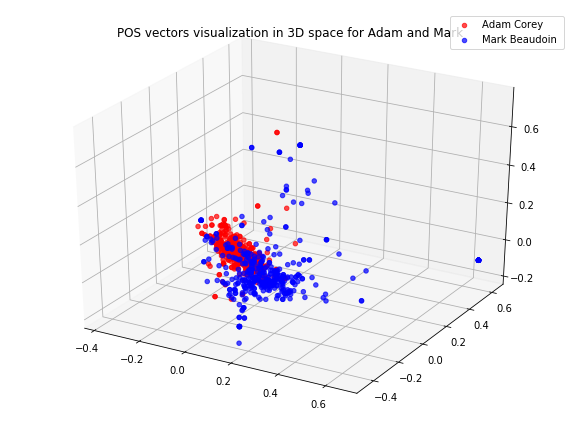

In [69]:
pca = PCA(n_components=3)
pca.fit(mat_pos_both)
fig = plt.figure(figsize=(10,7.5))
ax = fig.add_subplot(111, projection='3d')

pos_normed_pca = pca.transform(mat_pos_adam_normed)
x = pos_normed_pca[:,0]
y = pos_normed_pca[:,1]
z = pos_normed_pca[:,2]

ax.scatter(x, y, z, c='r', alpha = 0.7, label = 'Adam Corey')

pos_normed_pca = pca.transform(mat_pos_mark_normed)
x = pos_normed_pca[:,0]
y = pos_normed_pca[:,1]
z = pos_normed_pca[:,2]

ax.scatter(x, y, z, c='b', alpha = 0.7, label = 'Mark Beaudoin ')

plt.legend()
plt.title('POS vectors visualization in 3D space for Adam and Mark')
# plt.savefig('POS_3d.png')
plt.show()

# Apply Named Entity recognition

In [8]:
nlp = en_core_web_sm.load()

In [41]:
df = pd.read_csv('new_clean_output.csv', index_col=0)
# df.head()

In [43]:
re_rule = re.compile(r'\'(.*?)\'')

bodies_in_a_line = []
for body in df['Body'].values:
    lines = re_rule.findall(body)
    body_in_a_line = ''
    for line in lines:
        body_in_a_line = body_in_a_line + ' ' + line
    body_in_a_line = body_in_a_line.replace('  ',' ')
    body_in_a_line = body_in_a_line.replace('   ',' ')
    
    bodies_in_a_line.append(body_in_a_line.strip())

In [56]:
# this is slow
entities = []
entity_counts = []
for body in bodies_in_a_line:
    entity_pair = []
    doc = nlp(body)
    entity_pair = [(x.text, x.label_) for x in doc.ents]
    entities.append(entity_pair)
    
    entity_count = [x.label_ for x in doc.ents]
    entity_count = dict(Counter(entity_count))    
    entity_counts.append(entity_count)


In [70]:
df['entity'] = entities
df['entity_counts'] = labels
df.head()

,From,Sent,To,CC,Subject,Attachments,Body,title_length_c,title_length_w,body_length_w,POS,POS_dict,entity,entity_counts
1091,"['Heiter, Deborah [mailto:Deborah.Heiter@talgo...",2012-01-20 16:41:00,"[""Behenna, Bill; Branch, Cathy; Burn, Paula; C...",[],['Economic Development Target Issue Meeting'],[],"['', '', '', 'Deborah L. Heiter', 'Administrat...",41,5,31,"['NNP', 'NNP', 'NNP', 'NNP', 'NNP', 'PRP', 'NN...","{'NNP': 24, 'PRP': 1, 'IN': 1, 'CD': 5, ',': 2...","[(Deborah L. Heiter Administrative, PERSON), (...","{'PERSON': 1, 'GPE': 2, 'CARDINAL': 4, 'FAC': ..."
1092,['Beth Kirkland [mailto:bkirkland@taledc.com]'],2012-01-23 09:32:00,"[""'llaubscher@eflorida.com'""]","[""brook.pace@deo.myflorida.com; Kim Rivers(kim...",['City of Tallahassee meeting regarding SBCI'],[],"['', 'Louis,', '', 'Thank you for meeting with...",42,6,180,"['NNP', ',', 'NNP', 'PRP', 'IN', 'VBG', 'IN', ...","{'NNP': 63, ',': 11, 'PRP': 8, 'IN': 17, 'VBG'...","[(Ft, ORG), (Lauderdale, PERSON), (SSBCI, ORG)...","{'ORG': 8, 'PERSON': 5, 'CARDINAL': 6, 'TIME':..."
1093,"['Wiebler, Brian T.']",2012-02-27 10:04:00,[],[],['Rural Density'],[],"['', '', '']",13,2,0,[],{},[],{}
1094,"['Wiebler, Brian T.']",2012-03-01 15:51:00,"['Wiebler, Brian T.']",[],['Update on Rural Density Comprehensive Plan T...,[],"['', 'Thank you for your interest in the upcom...",69,9,182,"['NNP', 'PRP', 'IN', 'PRP$', 'NN', 'IN', 'DT',...","{'NNP': 25, 'PRP': 10, 'IN': 17, 'PRP$': 3, 'N...","[(Comprehensive Plan, LAW), (the Comprehensive...","{'LAW': 3, 'PERSON': 2, 'ORG': 1, 'GPE': 2}"
1095,"['Wiebler, Brian T.']",2012-03-27 15:59:00,"['Wiebler, Brian T.']",[],['Rural Density Comprehensive Plan Text Amendm...,[],"['', 'This is a reminder of the open house eve...",59,7,400,"['DT', 'VBZ', 'DT', 'NN', 'IN', 'DT', 'JJ', 'N...","{'DT': 38, 'VBZ': 7, 'NN': 55, 'IN': 35, 'JJ':...","[(Wednesday, DATE), (evening, TIME), (Tallahas...","{'DATE': 8, 'TIME': 8, 'GPE': 5, 'LAW': 3, 'PE..."


In [59]:
df.to_csv('new_clean_output.csv')

In [48]:
displacy.render(nlp(bodies_in_a_line[1]), jupyter=True, style='ent')

In [50]:
displacy.render(nlp(bodies_in_a_line[0]), style='dep', jupyter = True, options = {'distance': 120})